# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import seaborn as sns
import warnings

sns.set_style('darkgrid')
%matplotlib inline

State your null hypothesis here (be sure to make it quantitative as before)

In [2]:
# H_0 = Your null hypothesis
"""
the new template and old template will both have a response rate of 5%
"""
pass

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [3]:
# H_1 = Your alternative hypothesis
"""
the new template will have a response rate >= 6% OR <= 4% (i.e at least 1% greater than, or less than, the current)
"""
pass

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [4]:
# Calculate the required sample size
alpha = 0.05
std = .0475
d = .01/std
power = .8

test = TTestIndPower()

test.solve_power(alpha=alpha, power=power, effect_size=d)

n = round(test.solve_power(alpha=alpha, power=power, effect_size=d) + .5)
n

356

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [5]:
#Your code; plot power curves for the various alpha and effect size combinations

In [43]:
alphas = np.array([.01, .05, .1])

mean_diffs = np.array([.005, .01, .02, .03])
ds = mean_diffs/std

ds

array([0.10526316, 0.21052632, 0.42105263, 0.63157895])

In [44]:
def plot_power(x, effect_sizes, sample_size_range):
    test.plot_power(dep_var='nobs',
                    nobs = sample_size_range,
                    effect_size=effect_sizes,
                    alpha=x)
    return plt.show()

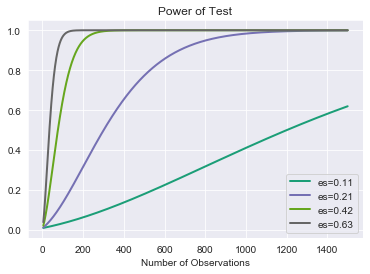

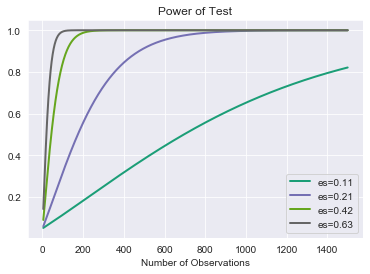

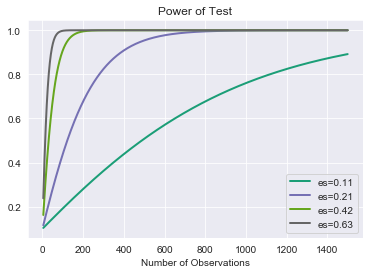

In [45]:
for i in alphas:
    plot_power(i, ds, sample_size_range)

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
"""
alpha .05 because @ an alpha of .01 is virtually impossible to reject the null, and 
sample size 600 because the power would be over .9 at that rate

if they want to limit possibility of reducing sales during testing, they could reduce the sample size to 356
and retain a power of .8

Advantage: low alpha and high power significantly limits both Type 1 and Type 2 errors
Disadvantage: large sample size could possibly hurt sales for websites with smaller web traffic
"""

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.